# Datos Faltantes

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [3]:
data.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
312,-0.074533,-0.044642,-0.023451,-0.005670,-0.020832,-0.014153,0.015505,-0.039493,-0.038460,-0.030072,144.0
115,-0.030942,0.050680,0.001339,-0.005670,0.064477,0.049416,-0.047082,0.108111,0.083799,0.003064,229.0
114,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775,258.0
205,-0.030942,-0.044642,0.046607,0.014987,-0.016704,-0.047034,0.000779,-0.002592,0.063453,-0.025930,99.0
397,0.052606,-0.044642,-0.004050,-0.030907,-0.046975,-0.058307,-0.013948,-0.025840,0.036060,0.023775,198.0
297,0.001751,-0.044642,-0.008362,-0.064199,-0.038720,-0.024487,0.004460,-0.039493,-0.064685,-0.054925,31.0
119,0.016281,-0.044642,-0.047163,-0.002228,-0.019456,-0.042963,0.033914,-0.039493,0.027364,0.027917,200.0
24,-0.063635,-0.044642,0.035829,-0.022885,-0.030464,-0.018850,-0.006584,-0.002592,-0.025953,-0.054925,184.0
19,-0.027310,-0.044642,-0.018062,-0.040099,-0.002945,-0.011335,0.037595,-0.039493,-0.008943,-0.054925,168.0
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0


In [4]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

In [5]:


diabetes = load_diabetes(as_frame=True)
data = diabetes.data.copy()
data['target'] = diabetes.target

np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

missing_counts = data.isna().sum().sort_values(ascending=False)
print(missing_counts)


bmi       44
bp        44
age        0
sex        0
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64


### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [6]:


np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# 3. Verificar los valores faltantes antes de la imputación
print("Valores faltantes antes de la imputación:")
print(data['bmi'].isna().sum())

# 4. Crear el objeto SimpleImputer con estrategia = 'mean'
imputer_mean = SimpleImputer(strategy='mean')

# 5. Aplicar la imputación solo a la columna 'bmi'
data['bmi'] = imputer_mean.fit_transform(data[['bmi']])

# 6. Verificar que ya no hay valores faltantes en 'bmi'
print("\nValores faltantes después de la imputación:")
print(data['bmi'].isna().sum())

# 7. Mostrar las primeras filas para comprobar visualmente
data.head()


Valores faltantes antes de la imputación:
44

Valores faltantes después de la imputación:
0


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,NaN,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

Comparación de resultados entre imputación simple y KNN:
           Método  Media_bmi  DesvEst_bmi  Media_bp  DesvEst_bp
0  Simple (media)  -0.000205     0.044583  0.000465    0.045583
1             KNN   0.000213     0.045416  0.000296    0.046323


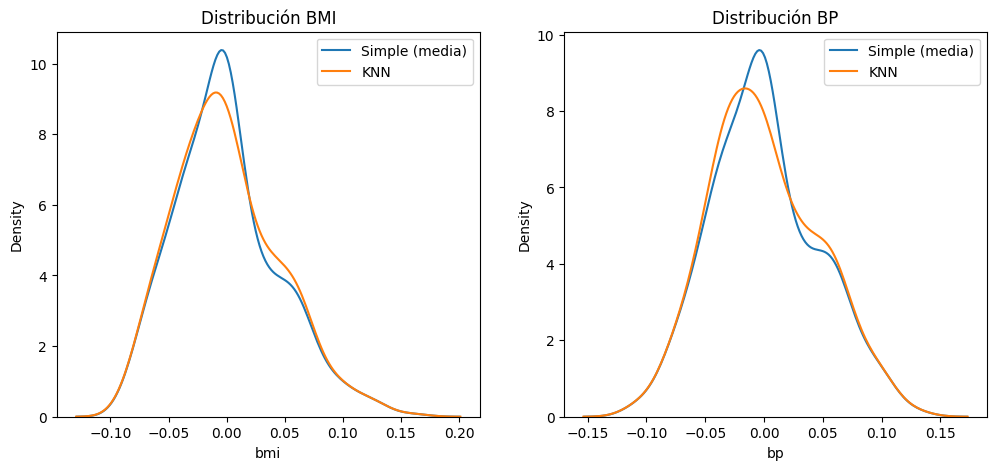

In [7]:
# 1. Importar librerías necesarias


# 2. Cargar datos y simular valores faltantes
diabetes = load_diabetes(as_frame=True)
data = diabetes.data.copy()
data['target'] = diabetes.target

np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# 3. Imputación simple (media)
simple_imputer = SimpleImputer(strategy='mean')
data_simple = data.copy()
data_simple[['bmi', 'bp']] = simple_imputer.fit_transform(data[['bmi', 'bp']])

# 4. Imputación con KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
data_knn = data.copy()
data_knn[['bmi', 'bp']] = knn_imputer.fit_transform(data[['bmi', 'bp']])

# 5. Comparar resultados estadísticos
comparison = pd.DataFrame({
    'Método': ['Simple (media)', 'KNN'],
    'Media_bmi': [data_simple['bmi'].mean(), data_knn['bmi'].mean()],
    'DesvEst_bmi': [data_simple['bmi'].std(), data_knn['bmi'].std()],
    'Media_bp': [data_simple['bp'].mean(), data_knn['bp'].mean()],
    'DesvEst_bp': [data_simple['bp'].std(), data_knn['bp'].std()]
})

print("Comparación de resultados entre imputación simple y KNN:")
print(comparison)

# 6. (Opcional) Visualizar comparaciones
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(data_simple['bmi'], label='Simple (media)', ax=axes[0])
sns.kdeplot(data_knn['bmi'], label='KNN', ax=axes[0])
axes[0].set_title('Distribución BMI')
axes[0].legend()

sns.kdeplot(data_simple['bp'], label='Simple (media)', ax=axes[1])
sns.kdeplot(data_knn['bp'], label='KNN', ax=axes[1])
axes[1].set_title('Distribución BP')
axes[1].legend()

plt.show()

### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

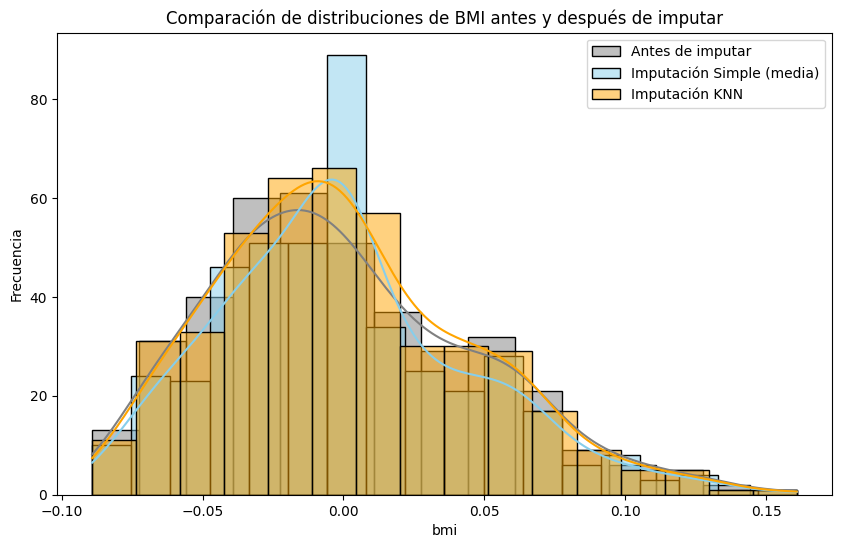

In [8]:


# 2. Cargar datos y simular valores faltantes
diabetes = load_diabetes(as_frame=True)
data = diabetes.data.copy()
data['target'] = diabetes.target

np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

# Guardar datos originales antes de imputar
bmi_original = data['bmi']

# 3. Imputación simple (media)
simple_imputer = SimpleImputer(strategy='mean')
data_simple = data.copy()
data_simple['bmi'] = simple_imputer.fit_transform(data[['bmi']])

# 4. Imputación con KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
data_knn = data.copy()
data_knn[['bmi', 'bp']] = knn_imputer.fit_transform(data[['bmi', 'bp']])

# 5. Graficar histogramas comparativos
plt.figure(figsize=(10,6))
sns.histplot(bmi_original, color='gray', label='Antes de imputar', kde=True)
sns.histplot(data_simple['bmi'], color='skyblue', label='Imputación Simple (media)', kde=True)
sns.histplot(data_knn['bmi'], color='orange', label='Imputación KNN', kde=True)
plt.title('Comparación de distribuciones de BMI antes y después de imputar')
plt.xlabel('bmi')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()